<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Fahrenheit-to-Celsius/blob/main/Celsius_a_Fahrenheit_Johan_Santana_Galv%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Generar 1000 temperaturas Celsius aleatorias
np.random.seed(0)  # Para reproducibilidad
celsius = np.random.uniform(low=-20.0, high=40.0, size=1000)

# Convertir a Fahrenheit usando la fórmula: F = (C * 9/5) + 32
fahrenheit = (celsius * 9/5) + 32

# Crear DataFrame
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})



In [ ]:
# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Dividir conjunto de prueba en prueba y validación
test_data, validation_data = train_test_split(test_data, test_size=0.25, random_state=42)

In [ ]:
# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(train_data))
print("Tamaño del conjunto de prueba:", len(test_data))
print("Tamaño del conjunto de validación:", len(validation_data))

Tamaño del conjunto de entrenamiento: 800
Tamaño del conjunto de prueba: 150
Tamaño del conjunto de validación: 50


In [ ]:
# Asignar características (X) y etiquetas (Y)
X_train = train_data[['Celsius']]
y_train = train_data['Fahrenheit']

X_test = test_data[['Celsius']]
y_test = test_data['Fahrenheit']

X_validation = validation_data[['Celsius']]
y_validation = validation_data['Fahrenheit']

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

print("Comenzando entrenamiento...")
historial = modelo.fit(X_train, y_train, epochs=300, validation_data=(X_validation, y_validation),verbose=False)
print("Modelo Entrenado")

Comenzando entrenamiento...
Modelo Entrenado


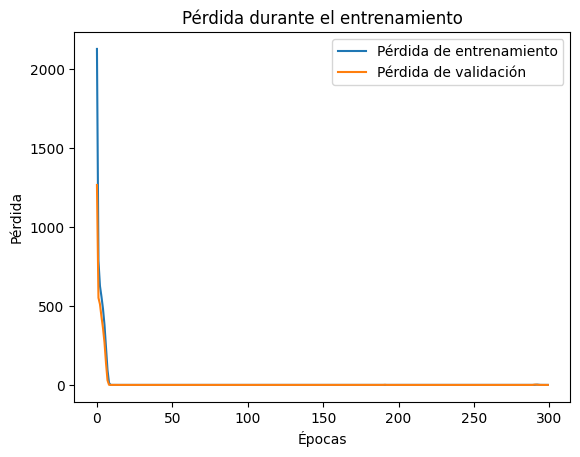

In [ ]:
import matplotlib.pyplot as plt

# Obtener la pérdida y la precisión del historial
loss = historial.history['loss']
val_loss = historial.history['val_loss']

# Graficar la pérdida
plt.plot(loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

In [ ]:
resultado = modelo.predict([100.0])
print("Predicción 100 grados celsius son " +str(resultado) + "fahrenheit!")

1/1 [==============================] - 0s 105ms/step
Predicción 100 grados celsius son [[211.99995]]fahrenheit!


In [ ]:
modelo.save('celsius_a_fahrenheit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
    Found 

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2024-04-17 17:36:34.664463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!ls carpeta_salida

group1-shard1of1.bin  model.json
